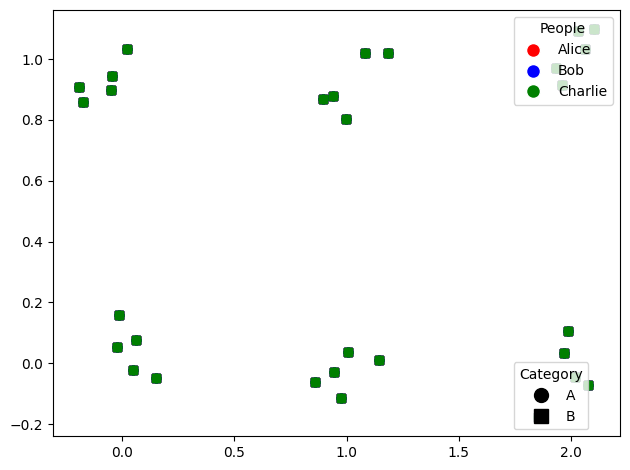

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
np.random.seed(42)
people = ['Alice', 'Bob', 'Charlie']
categories = ['A', 'B']
colors = {'Alice': 'red', 'Bob': 'blue', 'Charlie': 'green'}
shapes = {'A': 'o', 'B': 's'}  # o=圆形, s=方形

# 生成数据：每个人在每个类别中有5个点
data = []
for person in people:
    for category in categories:
        x = np.random.normal(loc=people.index(person), scale=0.1, size=5)
        y = np.random.normal(loc=categories.index(category), scale=0.1, size=5)
        data.extend(zip(x, y, [person]*5, [category]*5))

# 解压数据
x, y, person_labels, category_labels = zip(*data)

# 将标签转换为颜色和形状
scatter_colors = [colors[p] for p in person_labels]
scatter_markers = [shapes[c] for c in category_labels]

# 绘制散点图
fig, ax = plt.subplots()
for color, marker in zip(scatter_colors, scatter_markers):
    # 注意：这里每个点单独绘制，实际应优化为分组绘制以提高效率
    ax.scatter(x, y, c=color, marker=marker, alpha=0.6)

# 创建颜色图例的句柄（用圆形标记）
color_handles = [
    plt.Line2D([0], [0], 
               marker='o', 
               color='w', 
               label=person,
               markersize=10,
               markerfacecolor=color)
    for person, color in colors.items()
]

# 创建形状图例的句柄（用黑色）
shape_handles = [
    plt.Line2D([0], [0], 
               marker=shape, 
               color='k', 
               label=category,
               markersize=10,
               markerfacecolor='k',
               linestyle='None')
    for category, shape in shapes.items()
]

# 添加第一个图例（颜色）
leg1 = ax.legend(handles=color_handles, 
                title="People",
                loc='upper left',
                bbox_to_anchor=(0.8, 1))  # 右侧外部

# 添加第二个图例（形状）
leg2 = ax.legend(handles=shape_handles, 
                title="Category",
                loc='lower left',
                bbox_to_anchor=(0.8, 0))  # 右侧外部下方

# 必须手动添加第一个图例，因为第二个legend会覆盖默认
ax.add_artist(leg1)

# 调整布局防止重叠
plt.tight_layout(rect=[0, 0, 1, 1])  # 右侧留出40%空间给图例

plt.show()

In [9]:
import torch

In [12]:
help(torch.optim.Adam)

Help on class Adam in module torch.optim.adam:

class Adam(torch.optim.optimizer.Optimizer)
 |  Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False, *, foreach: Union[bool, NoneType] = None, maximize: bool = False, capturable: bool = False)
 |  
 |  Implements Adam algorithm.
 |  
 |  .. math::
 |     \begin{aligned}
 |          &\rule{110mm}{0.4pt}                                                                 \\
 |          &\textbf{input}      : \gamma \text{ (lr)}, \beta_1, \beta_2
 |              \text{ (betas)},\theta_0 \text{ (params)},f(\theta) \text{ (objective)}          \\
 |          &\hspace{13mm}      \lambda \text{ (weight decay)},  \: \textit{amsgrad},
 |              \:\textit{maximize}                                                              \\
 |          &\textbf{initialize} :  m_0 \leftarrow 0 \text{ ( first moment)},
 |              v_0\leftarrow 0 \text{ (second moment)},\: \widehat{v_0}^{max}\leftarrow 0\\[-1.ex]
 |          

In [10]:
from baseline_model_10h import ALL_10h
import os
import torch
import numpy as np
from torch.utils.data import Dataset
import pickle

#os.environ["CUDA_VISIBLE_DEVICES"] = "7"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#model = ALL_10h()

#model = torch.load('tfboard/mesa/ResHybridAtt/our_10h_all_cnn_200/saved_models/fold_0_epoch_46.pth').cuda()

model = torch.load('tfboard/mesa/ResHybridAtt/Comparative_Experiment_semi/mesa/our/our_semi_3/saved_models/fold_0_epoch_4.pth').cuda()

In [3]:
import torch.nn as nn
help(nn.BatchNorm1d)

Help on class BatchNorm1d in module torch.nn.modules.batchnorm:

class BatchNorm1d(_BatchNorm)
 |  BatchNorm1d(num_features: int, eps: float = 1e-05, momentum: float = 0.1, affine: bool = True, track_running_stats: bool = True, device=None, dtype=None) -> None
 |  
 |  Applies Batch Normalization over a 2D or 3D input as described in the paper
 |  `Batch Normalization: Accelerating Deep Network Training by Reducing
 |  Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .
 |  
 |  .. math::
 |  
 |      y = \frac{x - \mathrm{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta
 |  
 |  The mean and standard-deviation are calculated per-dimension over
 |  the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
 |  of size `C` (where `C` is the number of features or channels of the input). By default, the
 |  elements of :math:`\gamma` are set to 1 and the elements of :math:`\beta` are set to 0. The
 |  standard-deviation is calculated via t

In [10]:
f = open('/extern2/zgz/wq/sleep/sleep_stage_ppg/clean_mesa_300s/apnea/ApSense-main/processed_dataset/mesa/60_stride_30/mesa_label_0118.pckl', 'rb')
label = pickle.load(f)
f.close()

In [11]:
len(label)

1198

In [12]:
import torch.nn as nn

In [17]:
criterion = nn.CrossEntropyLoss( torch.tensor(weight) )

In [15]:
weight= [1, 1, 1, 1]

In [21]:
criterion.weight[0]

tensor(1)

In [19]:
class_counts = torch.tensor([4, 10, 1.5, 2.6])#label unbalence
total_samples = class_counts.sum()
weights = total_samples / class_counts  # 计算权重
weights = weights / weights.sum()

In [20]:
weights

tensor([0.1784, 0.0714, 0.4758, 0.2745])

In [6]:
np.unique(temp)

array([-1,  0,  1,  2,  3])

In [9]:
temp.shape

(1198, 15360, 1)

In [86]:
model.parameters

<bound method Module.parameters of ALL_10h(
  (fea_en): Sequential(
    (0): en_block(
      (layer): Sequential(
        (0): Conv1d(28, 36, kernel_size=(33,), stride=(1,), padding=(16,))
        (1): LayerNorm((3600,), eps=1e-05, elementwise_affine=True)
        (2): LeakyReLU(negative_slope=0.15)
        (3): Conv1d(36, 36, kernel_size=(33,), stride=(1,), padding=(16,))
        (4): LeakyReLU(negative_slope=0.15)
      )
      (AvgPool1d): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    )
    (1): en_block(
      (layer): Sequential(
        (0): Conv1d(64, 64, kernel_size=(33,), stride=(1,), padding=(16,))
        (1): LayerNorm((3600,), eps=1e-05, elementwise_affine=True)
        (2): LeakyReLU(negative_slope=0.15)
        (3): Conv1d(64, 64, kernel_size=(33,), stride=(1,), padding=(16,))
        (4): LeakyReLU(negative_slope=0.15)
      )
      (AvgPool1d): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    )
    (2): en_

In [1]:
from resunet_torch import ResUNet

# model creation
model_params = {
    'input_shape': [int(0.5 * 30 * 2 ** 10), 32, 1], #[int(ds_train.fsTime * ds_train.window), ds_train.nSpace, ds_train.nChannels], 
    'num_classes': 4, #len(events)
    'num_outputs': 30 * 2 ** 10/30,#ds_train.window // ds_train.prediction_resolution,
    'depth': 9,
    'init_filter_num': 16,
    'filter_increment_factor': 2 ** (1 / 3),
    'max_pool_size': (2, 2),
    'kernel_size': (16, 3)
}

resunet = ResUNet(**model_params)

UnboundLocalError: local variable 'features' referenced before assignment

In [ ]:
resunet

In [7]:
import torch

In [13]:
import numpy as np
resunet( torch.rand([1, 15360, 32, 1]) )

RuntimeError: Given groups=1, weight of size [16, 16, 16, 3], expected input[1, 15360, 32, 1] to have 16 channels, but got 15360 channels instead

In [3]:

from torchsummary import summary

summary(resunet, (15360, 32)) # print summary.

RuntimeError: Given groups=1, weight of size [16, 16, 16, 3], expected input[1, 2, 15360, 32] to have 16 channels, but got 2 channels instead

In [8]:
class Load_10h_Dataset(Dataset):
    def __init__(self, mode):
        super(Load_10h_Dataset, self).__init__()
        
        data_path = '../da300s/'
        
        self.mode = mode
        mode = mode + '_all'
        
        self.mask = torch.ones(32, dtype=torch.bool)
        self.mask[[6, 14, 22, 30]] = False
        
        with open(data_path + 'mesa/10h_input/train_fea_conseq_1654.pkl', 'rb') as f:#1354
            self.fea = pickle.load(f)
        with open(data_path + 'mesa/10h_input/train_sig_conseq_1654.pkl', 'rb') as f:
            self.sig = pickle.load(f)
        with open(data_path + 'mesa/10h_input/train_all_ppg_1654.pkl', 'rb') as f:
            self.ppg = pickle.load(f)
        with open(data_path + 'mesa/10h_input/train_all_label_frag_1654.pkl', 'rb') as f:
            self.test_label = pickle.load(f)
        with open(data_path + 'mesa/10h_input/train_ahi_label_1654.pkl', 'rb') as f:
            self.ahi_label = pickle.load(f)

        del_list = list()
        for i in range(len(self.ahi_label)):
            if (self.ahi_label[i].shape[0])==0:
                del_list.append(i)
        
        for index in sorted(del_list, reverse=True):
            del self.ahi_label[index]
            del self.test_label[index]
            del self.fea[index]
            del self.sig[index]
            del self.ppg[index]

        self.len = len(self.ppg)#2 * length#label.shape[0]
    def __getitem__(self, index):
        ppg = self.ppg[index].unsqueeze(0)
        sig = self.sig[index]
        fea = self.fea[index][self.mask]
        label = self.test_label[index][0, :1200]
        
        #frag_label = self.test_label[index][1, :1200]
        
        frag_label = torch.tensor(0)
        
        ahi_label = self.ahi_label[index][:1200]
        
        return ppg.float(), sig.float(), fea.float(), label.long(), frag_label.long(), ahi_label.long()
        
    def __len__(self):
        
        return self.len

In [29]:
train_loader = torch.utils.data.DataLoader(dataset=Load_10h_Dataset('train'), batch_size=1,
                                           shuffle=False, pin_memory=True,# drop_last=True,
                                           num_workers=0)

In [4]:
reli_cnt = np.zeros(4, dtype = int)
unreli_cnt = np.zeros(4, dtype = int)

our_cnt = np.zeros(4, dtype = int)
unour_cnt = np.zeros(4, dtype = int)

In [39]:
refea_1 = list()
unrefea_1 = list()

ourfea_1 = list()
adourfea_1 = list()
unourfea_1 = list()

In [36]:
for batch_idx, (ppg, sig, fea, label, frag_label, ahi_label) in enumerate(train_loader):
    break

In [9]:
ppg.shape

torch.Size([1, 1, 1228800])

In [10]:
ppg.numpy()[0, 0, 500*1024:530*1024]

array([1.442929  , 1.3334094 , 0.95558226, ..., 0.5737652 , 0.6290543 ,
       0.68066514], dtype=float32)

In [79]:
np.savetxt('ppg.csv', ppg.numpy()[0, 0, 511*1024+100:511*1024+700])

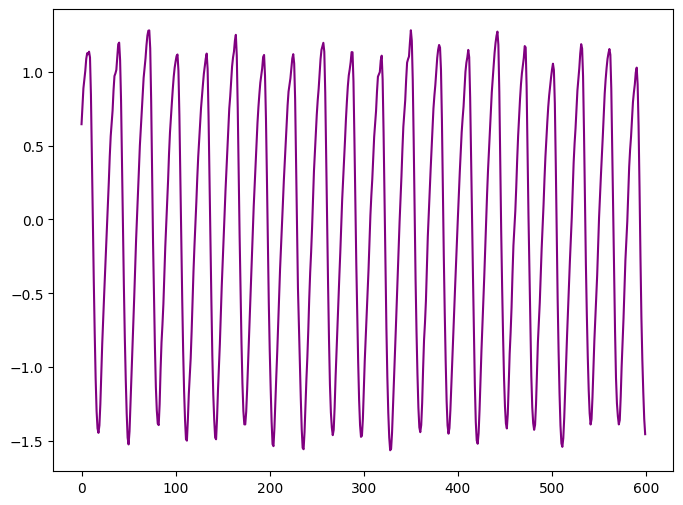

In [81]:
#for batch_idx, (ppg, sig, fea, label, frag_label, ahi_label) in enumerate(train_loader):
#    break
    
import numpy as np
import matplotlib.pyplot as plt

# 绘制散点图
plt.figure(figsize=(8, 6))

ax = plt.axes()
ax.plot(ppg.numpy()[0, 0, 511*1024+100:511*1024+700], color='purple' )#i
'''
plt.axis('off')
# 添加标题和标签
plt.title('20% Threshold Selection', fontsize=16)
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')
plt.legend(loc='upper right')
plt.savefig('fig3_20%.png', dpi=300)  '''
plt.show()
plt.close()

In [84]:
sig[0, 2, 511*60+6:511*60+42].numpy()

torch.Size([36])

In [116]:
from scipy import signal

nyquist_freq = 35

b_l, a_l = signal.butter(4, 0.5 / nyquist_freq, btype='low', analog=False)
env = signal.filtfilt(b_l, a_l, ppg.numpy()[0, 0, 511*1024-1100:511*1024+1700] )

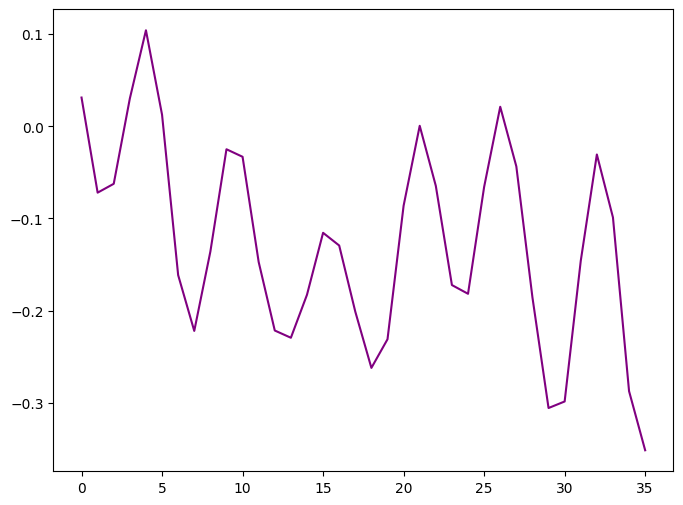

In [120]:
plt.figure(figsize=(8, 6))

ax = plt.axes()
ax.plot(sig.numpy()[0, 2, 511*60+6:511*60+42], color='purple' )#i

plt.show()
plt.close()

In [122]:
np.savetxt('breath.csv', sig.numpy()[0, 2, 511*60+6:511*60+42])

In [117]:
mean = np.mean(env[500:])
std = np.std(env[500:])

# 标准化数组
env[500:] = (env[500:] - mean) / std

In [118]:
np.savetxt('env.csv', env[1200:1800])

In [45]:
torch.stack(refea_1, axis = 0).shape

torch.Size([83, 768])

In [46]:
torch.stack(unrefea_1, axis = 0).shape

torch.Size([651, 768])

In [47]:
torch.stack(ourfea_1, axis = 0).shape

torch.Size([386, 768])

In [50]:
torch.stack(adourfea_1, axis = 0).shape

torch.Size([386, 768])

In [48]:
torch.stack(unourfea_1, axis = 0).shape

torch.Size([348, 768])

In [66]:
all = torch.stack(refea_1 + unrefea_1 + ourfea_1 + unourfea_1 + adourfea_1, axis = 0).cpu().detach().numpy()

In [67]:
all.shape

(1854, 768)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
from scipy.interpolate import splprep, splev

# 假设你有一些数据
data = all  # 100个样本，50个特征

# 使用 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

In [69]:
data_tsne.shape

(1854, 2)

In [63]:
len(refea_1)

83

In [74]:
refeatsne_1.shape,unrefeatsne_1.shape,ourfeatsne_1.shape,unourfeatsne_1.shape,adourfeatsne_1.shape

((83, 2), (651, 2), (386, 2), (348, 2), (386, 2))

In [70]:
refeatsne_1 = data_tsne[:len(refea_1)]
unrefeatsne_1 = data_tsne[len(refea_1):len(refea_1) + len(unrefea_1)]
ourfeatsne_1 = data_tsne[len(refea_1) + len(unrefea_1):len(refea_1) + len(unrefea_1) + len(ourfea_1)]
unourfeatsne_1 = data_tsne[len(refea_1) + len(unrefea_1) + len(ourfea_1):len(refea_1) + len(unrefea_1) + len(ourfea_1) + len(unourfea_1)]

adourfeatsne_1 = data_tsne[len(refea_1) + len(unrefea_1) + len(ourfea_1) + len(unourfea_1):
                    len(refea_1) + len(unrefea_1) + len(ourfea_1) + len(unourfea_1) + len(adourfea_1)]

In [75]:

# 计算 Convex Hull
hull = ConvexHull(refeatsne_1)

# 获取 Convex Hull 点的坐标
hull_points = refeatsne_1[hull.vertices]
hull_points = np.vstack([hull_points, hull_points[0]])

# 使用样条插值生成平滑曲线
tck, u = splprep(hull_points.T, s=0)  # s=0表示没有平滑
x_smooth, y_smooth = splev(np.linspace(0, 1, 1000), tck)

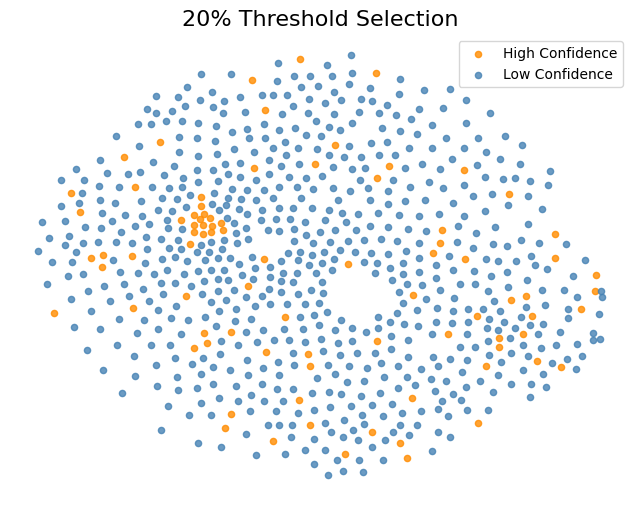

In [139]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(refeatsne_1[:, 0], refeatsne_1[:, 1], s=20, alpha=0.8, c='darkorange', label='High Confidence')
plt.scatter(unrefeatsne_1[:, 0], unrefeatsne_1[:, 1], s=20, alpha=0.8, c='steelblue', label='Low Confidence')

# 绘制平滑的曲线
#plt.plot(x_smooth, y_smooth, color='red', linewidth=2, linestyle='--', label='Smoothed Convex Hull')
plt.axis('off')
# 添加标题和标签
plt.title('20% Threshold Selection', fontsize=16)
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')
plt.legend(loc='upper right')
plt.savefig('fig3_20%.png', dpi=300)  
plt.show()
plt.close()

In [81]:
# 计算 Convex Hull
hull = ConvexHull(ourfeatsne_1)

# 获取 Convex Hull 点的坐标
hull_points = ourfeatsne_1[hull.vertices]
hull_points = np.vstack([hull_points, hull_points[0]])

# 使用样条插值生成平滑曲线
tck, u = splprep(hull_points.T, s=0)  # s=0表示没有平滑
x_smooth, y_smooth = splev(np.linspace(0, 1, 1000), tck)

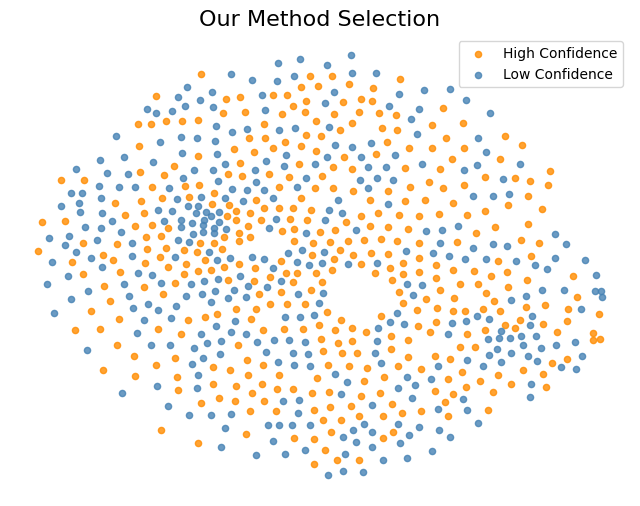

In [138]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(ourfeatsne_1[:, 0], ourfeatsne_1[:, 1], s=20, alpha=0.8, c='darkorange', label='High Confidence')
plt.scatter(unourfeatsne_1[:, 0], unourfeatsne_1[:, 1], s=20, alpha=0.8, c='steelblue', label='Low Confidence')

# 绘制平滑的曲线
#plt.plot(x_smooth, y_smooth, color='red', linewidth=2, linestyle='--', label='Smoothed Convex Hull')
plt.axis('off')
# 添加标题和标签
plt.title('Our Method Selection', fontsize=16)
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')
plt.legend(loc='upper right')
plt.savefig('fig3_our.png', dpi=300)  
plt.show()
plt.close()

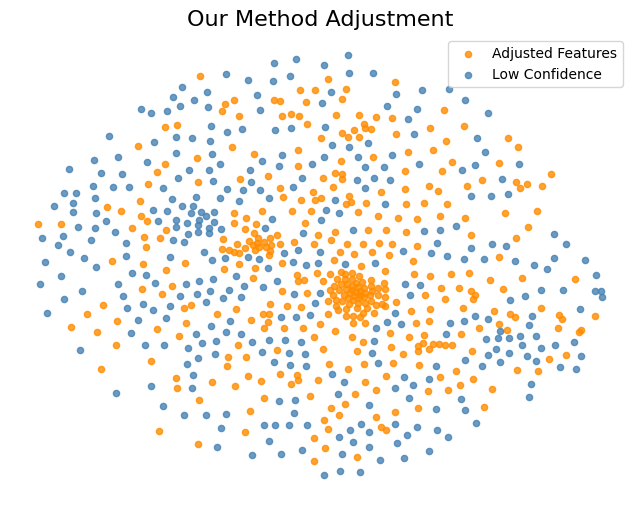

In [137]:
# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(adourfeatsne_1[:, 0], adourfeatsne_1[:, 1], s=20, alpha=0.8, c='darkorange', label='Adjusted Features')
plt.scatter(unourfeatsne_1[:, 0], unourfeatsne_1[:, 1], s=20, alpha=0.8, c='steelblue', label='Low Confidence')

# 绘制平滑的曲线
#plt.plot(x_smooth, y_smooth, color='red', linewidth=2, linestyle='--', label='Smoothed Convex Hull')
plt.axis('off')
# 添加标题和标签
plt.title('Our Method Adjustment', fontsize=16)
#plt.xlabel('t-SNE Component 1')
#plt.ylabel('t-SNE Component 2')
plt.legend(loc='upper right')
plt.savefig('fig3_ouradjust.png', dpi=300)  
plt.show()
plt.close()

In [38]:
our_cnt

array([287731, 760117, 108598, 195601])

In [39]:
unour_cnt

array([25105, 76038, 11796, 19094])

In [42]:
reli_cnt

array([84210, 76246, 34416, 99658])

In [43]:
unreli_cnt

array([228626, 759909,  85978, 115037])

In [46]:
our_cnt / (our_cnt + unour_cnt)

array([0.91975028, 0.90906232, 0.9020217 , 0.91106453])

In [47]:
reli_cnt / (reli_cnt + unreli_cnt)

array([0.26918257, 0.09118644, 0.28586142, 0.46418408])

In [7]:
import torch
import pandas as pd

# 创建一个示例 PyTorch 张量
tensor = torch.stack([torch.stack(i) for i in posi_list]).transpose(0, 1)  # 例如，一个 1200x4 的张量

# 将张量转换为 NumPy 数组
numpy_array = tensor.cpu().detach().numpy()

# 将 NumPy 数组转换为 Pandas DataFrame
df = pd.DataFrame(numpy_array)

# 保存 DataFrame 为 CSV 文件
df.to_csv('output_prob.csv', index=False, header=False)  # index=False 表示不保存行索引，header=False 表示不保存列名

In [35]:
for batch_idx, (ppg, sig, fea, label, frag_label, ahi_label) in enumerate(train_loader):

    if label.shape[1] != 1200:
        continue

    if batch_idx<=27:
        continue

    y_frag = frag_label.squeeze(0)
    y = label.squeeze(0)
    ahi_label = ahi_label.squeeze(0)
    
    y = y #+ y_frag * 4 + ahi_label * 8

    y = y.long().to(device)
    
    ppg = ppg.to(device)
    sig = sig.to(device)
    fea = fea.to(device)
    outputs = model(ppg, sig, fea)
    
    if type(outputs) in (tuple, list):
        
        feature, outputs = outputs[0], outputs[1]

    else:
        feature = outputs

    feature = feature[0, :y.shape[0], :]
    outputs = outputs[0, :y.shape[0], :]

    break
    
    #value, predicted = torch.max(outputs[:, :].data, dim=1)
    posi_list = list()
    for i in range(4):
        posi_list.append(list())
    
    n = len(outputs)
    
    prob_tea_i = outputs.clone()
    
    entropy_i = - torch.sum(prob_tea_i * torch.log(prob_tea_i + 1e-10), dim=1)
    entropy_i = (entropy_i-entropy_i.min())/(entropy_i.max()-entropy_i.min())
    '''for i in range(4):
        for j in range(len(prob_tea_i)):
            posi_list[i].append(prob_tea_i[j][i]-entropy_i[j])
    '''
    for i in range(4):
        for j in range(len(prob_tea_i)):
            posi_list[i].append(prob_tea_i[j][i]-entropy_i[j])
    
    posi_list = torch.clamp(torch.stack([torch.stack(i) for i in posi_list]), min=0).detach()
    our = posi_list.any(axis = 0)
    
    low_k = int(n * 0.2)
    low_k =  torch.kthvalue(entropy_i, low_k ).values
    value, predicted = torch.max(outputs[:, :].data, dim=1)
    reli = entropy_i < low_k

    for i in range(len(y)):
        if(reli[i]):
            reli_cnt[y[i]] = reli_cnt[y[i]] + 1
        else:
            unreli_cnt[y[i]] = unreli_cnt[y[i]] + 1

        if(our[i]):
            our_cnt[y[i]] = our_cnt[y[i]] + 1
        else:
            unour_cnt[y[i]] = unour_cnt[y[i]] + 1
        
    #train_loss = 0
    print(batch_idx)

In [37]:
batch_idx

78

In [12]:
outputs.shape

torch.Size([1200, 4])

In [3]:
import torch

In [8]:
torch.tensor([1, 2, 3])[1:]

tensor([2, 3])

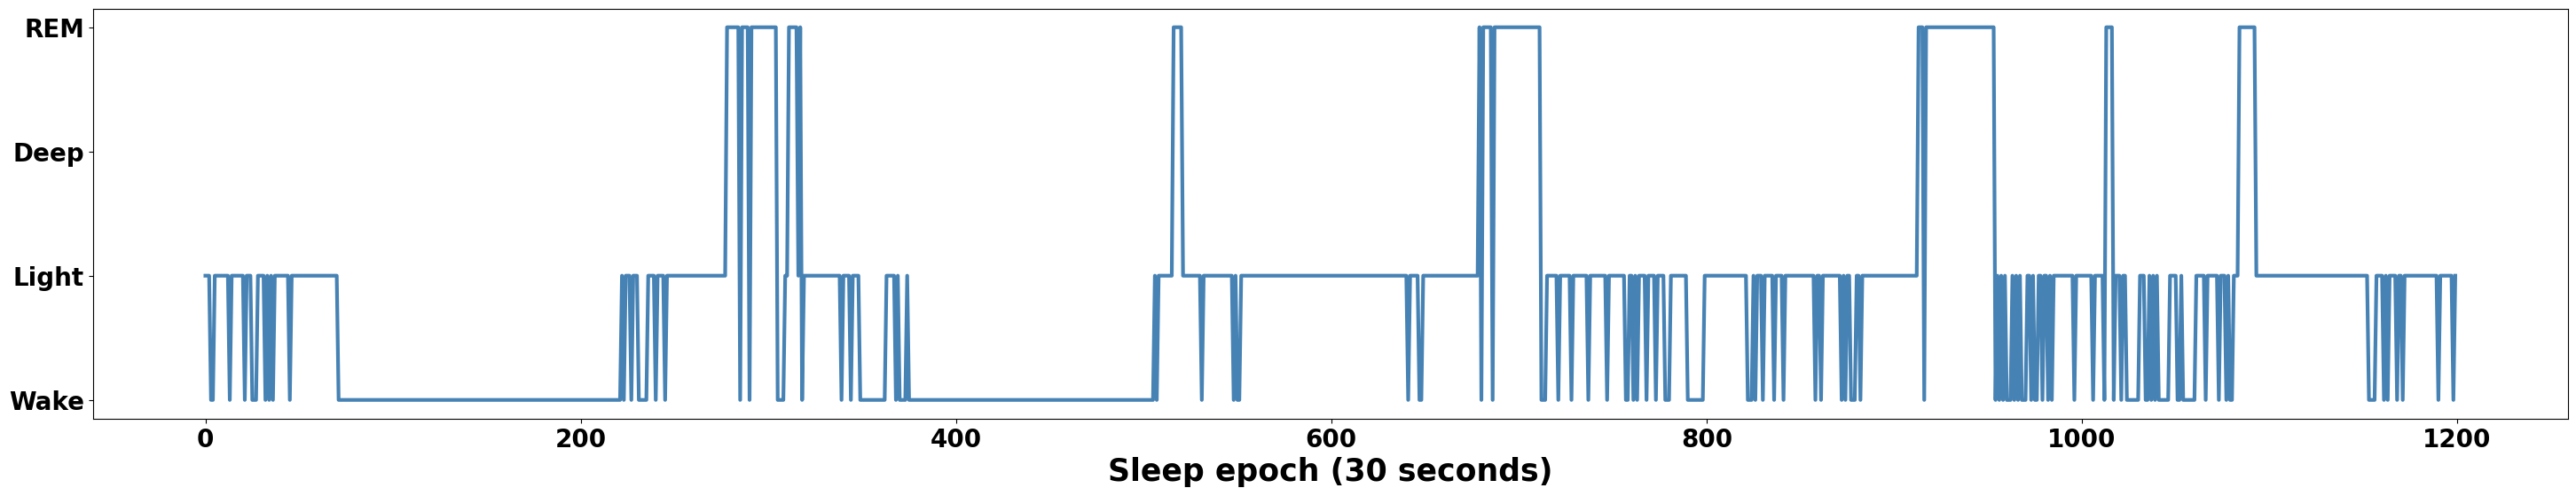

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(36, 6))
ax = plt.axes()
ax.plot(y.tolist(),  color="steelblue", lw=3)#i
plt.yticks([0, 1, 2, 3],['Wake', 'Light', 'Deep', 'REM'], weight='bold')
plt.tick_params(labelsize=20)
plt.xticks(weight='bold')
plt.xlabel("Sleep epoch (30 seconds)",fontsize = 25, weight='bold' )
plt.savefig('true.png', dpi=300, bbox_inches='tight')  
plt.show()

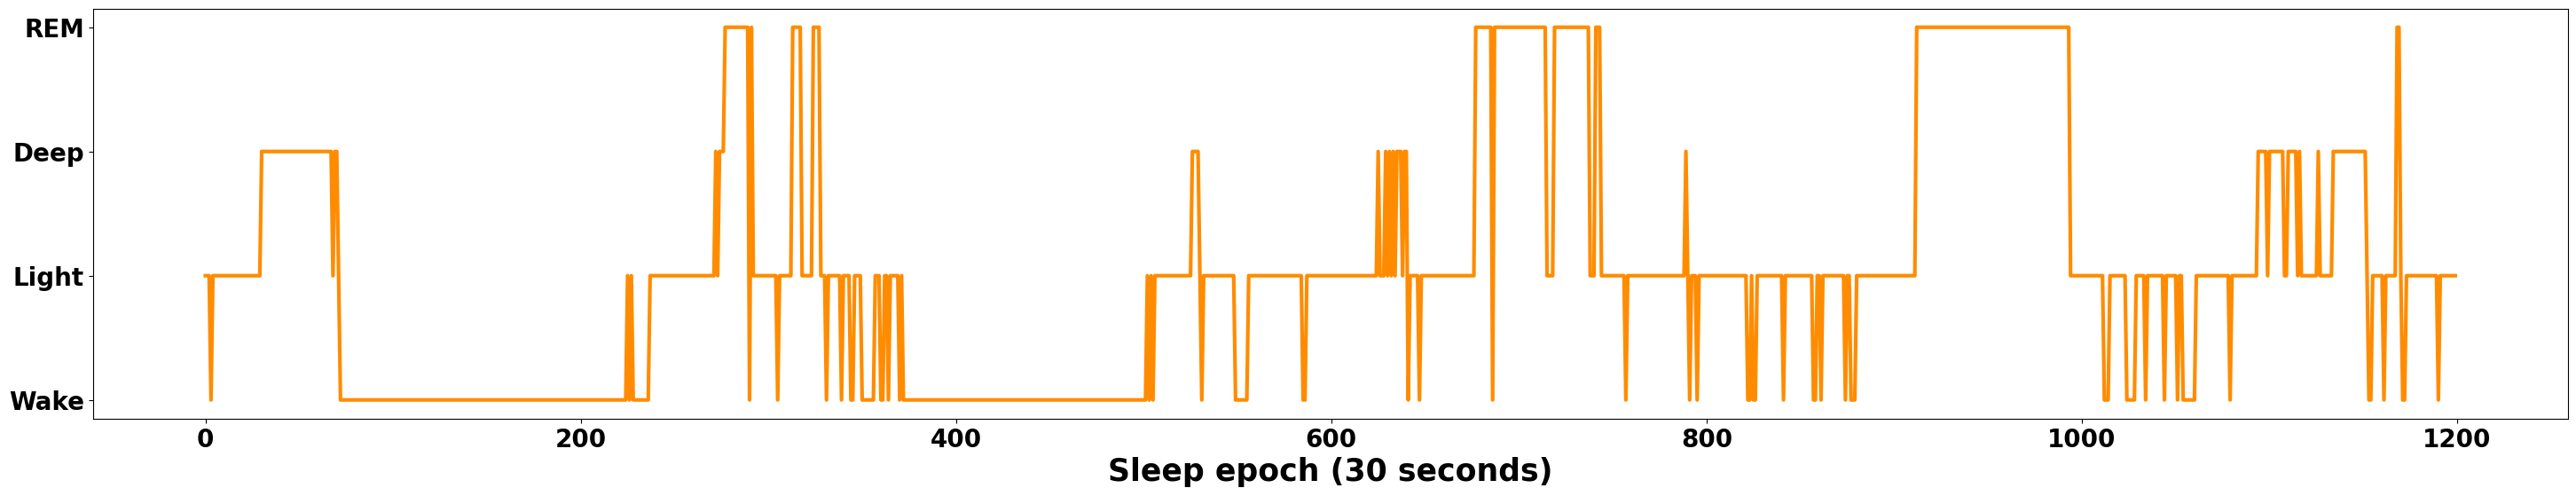

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(36, 6))
ax = plt.axes()
ax.plot(outputs.max(axis=1).indices.tolist(), color="darkorange", lw=3)#i

plt.yticks([0, 1, 2, 3],['Wake', 'Light', 'Deep', 'REM'], weight='bold')
plt.tick_params(labelsize=20)
plt.xticks(weight='bold')
plt.xlabel("Sleep epoch (30 seconds)",fontsize = 25, weight='bold' )
plt.savefig('predict.png', dpi=300, bbox_inches='tight')  
plt.show()